In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from numpy.polynomial import Polynomial

---

# Lagrange polynomials

In [27]:
X = np.arange(5)
Y = np.sin(X)

base = []
for i,x in enumerate(X):
    f = np.poly1d([1])
    for k,y in enumerate(X):
        if i == k : continue
        f *= np.poly1d([1, -y])/( x - y)
    base.append(f)

[poly1d([ 0.04166667, -0.41666667,  1.45833333, -2.08333333,  1.        ]),
 poly1d([-0.16666667,  1.5       , -4.33333333,  4.        ,  0.        ]),
 poly1d([ 0.25, -2.  ,  4.75, -3.  ,  0.  ]),
 poly1d([-0.16666667,  1.16666667, -2.33333333,  1.33333333,  0.        ]),
 poly1d([ 0.04166667, -0.25      ,  0.45833333, -0.25      ,  0.        ])]

In [33]:
fit = sum([ y*p for y, p  in zip(Y,base)])
fit = np.poly1d(fit)

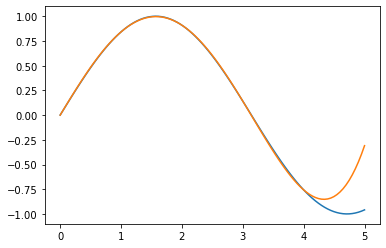

In [41]:
T = np.linspace(0,5,100)

plt.plot(T, np.sin(T))
plt.plot(T,fit(T));

---

# Newton’s Polynomial Interpolation

Then I got tired and I got the code from 
[here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html)

In [37]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x - x_data[n-k])*p
    return p

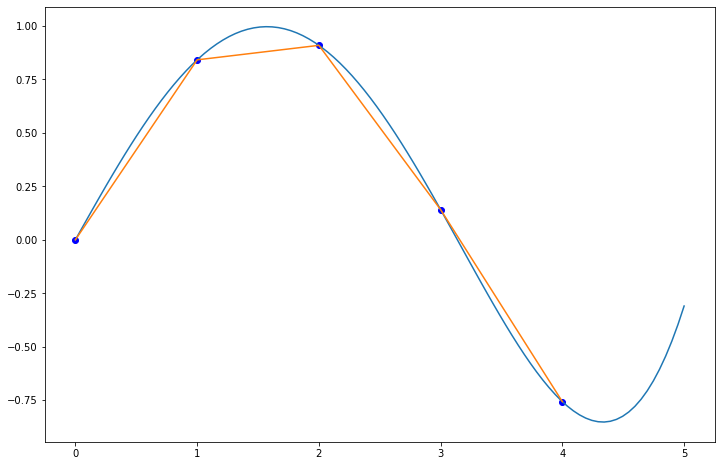

In [40]:
x = X
y = Y
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.linspace(0,5,100)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.plot(X,Y)